In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 加载数据
file_path_Mix_dataset_One_Hot = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot.csv"
file_path_Mix_dataset_One_Hot_LDA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_LDA.csv"
file_path_Mix_dataset_One_Hot_PCA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_PCA.csv"
file_path_Mix_dataset_One_Hot_MI = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_MI.csv"
file_path_Mix_dataset_One_Hot_Pearson = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_One_Hot_Pearson.csv"

file_path_Mix_dataset_Label_Encoding = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding.csv"
file_path_Mix_dataset_Label_Encoding_LDA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_LDA.csv"
file_path_Mix_dataset_Label_Encoding_PCA = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_PCA.csv"
file_path_Mix_dataset_Label_Encoding_MI = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_MI.csv"
file_path_Mix_dataset_Label_Encoding_Pearson = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Mix_dataset_Label_Encoding_Pearson.csv"
# 加载数据
final_data = pd.read_csv(file_path_Mix_dataset_One_Hot_MI, header=0)
final_data.head()

,service_eco_i,srv_rerror_rate,duration,dst_host_srv_rerror_rate,rerror_rate,service_private,dst_host_rerror_rate,srv_diff_host_rate,srv_count,dst_host_count,...,flag_SF,dst_host_same_srv_rate,dst_host_srv_count,count,dst_host_diff_srv_rate,same_srv_rate,diff_srv_rate,dst_bytes,src_bytes,label
0,-0.183696,-0.405192,-0.112481,-0.406815,-0.40646,-0.467387,-0.267151,-0.376389,-0.348310,-0.344349,...,0.808391,-0.813554,-0.849240,-0.696611,-0.278736,0.749108,-0.348092,-0.004614,-0.007346,0
1,-0.183696,-0.405192,-0.112481,-0.406815,-0.40646,-0.467387,-0.422074,-0.376389,-0.361578,0.721338,...,0.808391,-1.192968,-1.065006,-0.602401,2.657874,-1.358363,0.422462,-0.004614,-0.007409,0
2,-0.183696,-0.405192,-0.112481,-0.406815,-0.40646,2.139552,-0.422074,-0.376389,-0.295238,0.721338,...,-1.237025,-0.969783,-0.840250,0.339700,-0.175697,-1.427085,0.011499,-0.004614,-0.007436,1
3,-0.183696,-0.405192,-0.112481,-0.376989,-0.40646,-0.467387,-0.422074,-0.376389,-0.308506,-1.562277,...,0.808391,1.038878,1.218511,-0.670918,-0.433294,0.749108,-0.348092,-0.002413,-0.007394,0
4,-0.183696,-0.405192,-0.112481,-0.406815,-0.40646,-0.467387,-0.422074,-0.028744,0.049729,0.721338,...,0.808391,1.038878,1.218511,-0.456804,-0.433294,0.749108,-0.348092,-0.004501,-0.007400,0


In [3]:
X = final_data.iloc[:, :-1].values # 除目标属性外的数据集
y = final_data.iloc[:, -1].values   # 目标属性（标签）

In [4]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [5]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# 
# # 初始化 SMOTE 对象
# smote = SMOTE()
# 
# # 对训练集进行重采样
# X_train, y_train  = smote.fit_resample(X_train, y_train)
# 
# # 打印重采样后的数据规模
# print(f'重采样后的数据规模')
# print(f'X_train_resampled shape: {X_train.shape}')
# print(f'y_train_resampled shape: {y_train.shape}')
# print(Counter(y_train))

重采样后的数据规模
X_train_resampled shape: (288950, 28)
y_train_resampled shape: (288950,)
Counter({1: 57790, 0: 57790, 3: 57790, 2: 57790, 4: 57790})


In [5]:
from collections import Counter
from imblearn.over_sampling import ADASYN

# 初始化 ADASYN 对象
adasyn = ADASYN()

# 对训练集进行重采样
X_train, y_train = adasyn.fit_resample(X_train, y_train)

# 打印重采样后的数据规模
print(f'重采样后的数据规模')
print(f'X_train_resampled shape: {X_train.shape}')
print(f'y_train_resampled shape: {y_train.shape}')
print(Counter(y_train))

重采样后的数据规模
X_train_resampled shape: (288997, 28)
y_train_resampled shape: (288997,)
Counter({3: 57880, 0: 57790, 2: 57789, 1: 57770, 4: 57768})


In [6]:
# 重塑训练数据和测试数据以适配模型的输入 (假设每个样本只有单个时间步长)
x_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [7]:
# 对于多分类问题，标签y需要进行one-hot编码
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

# 初始化顺序模型
model = Sequential()

# 修改这里的input_shape以匹配实际的特征数量
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1, 28)))
model.add(Dropout(0.5))
# 添加更多的LSTM层或其他类型的层
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.5))

# 输出层，使用softmax激活函数，适用于多分类问题
model.add(Dense(5, activation='softmax'))
# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# 打印模型概述信息
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 200)           103200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 200)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              100400    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 204,105
Trainable params: 204,105
Non-trai

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# 定义模型检查点回调
checkpoint = ModelCheckpoint(
    r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Model\NSL-KDD\AUG\LSTM\Mix_dataset_One_Hot_MI_ADASYN.h5",
    monitor='val_accuracy',  # 监视验证集的准确率
    verbose=1,               # 打印出详细日志
    save_best_only=True,     # 只保存在验证集上准确率最高的模型
    mode='max'               # 'max'表示监视的指标（val_accuracy）需要被最大化
)

# 定义CSV日志记录回调
csv_logger = CSVLogger(
    r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Model\NSL-KDD\AUG\LSTM\CSV\Mix_dataset_One_Hot_MI_ADASYN.csv",
    separator=",",
    append=False  # 每次开始训练都重新写日志文件
)

# 使用调整后的fit方法开始训练
history = model.fit(
    x_train,
    y_train,
    epochs=300,  # 训练100个epoch
    batch_size=2500,  # 每个批次的样本数
    validation_split=0.2,  # 使用20%的训练数据作为验证集
    callbacks=[checkpoint, csv_logger]  # 使用回调函数
)

Epoch 1/300
84/93 [==========================>...] - ETA: 0s - loss: 0.9389 - accuracy: 0.7181
Epoch 00001: val_accuracy improved from -inf to 0.00209, saving model to D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\Model\NSL-KDD\AUG\LSTM\Mix_dataset_One_Hot_MI_ADASYN.h5
93/93 [==============================] - 4s 14ms/step - loss: 0.9066 - accuracy: 0.7253 - val_loss: 4.8902 - val_accuracy: 0.0021
Epoch 2/300
89/93 [===========================>..] - ETA: 0s - loss: 0.5139 - accuracy: 0.8154
Epoch 00002: val_accuracy did not improve from 0.00209
93/93 [==============================] - 1s 6ms/step - loss: 0.5122 - accuracy: 0.8158 - val_loss: 5.5286 - val_accuracy: 0.0021
Epoch 3/300
88/93 [===========================>..] - ETA: 0s - loss: 0.4189 - accuracy: 0.8448
Epoch 00003: val_accuracy did not improve from 0.00209
93/93 [==============================] - 1s 6ms/step - loss: 0.4173 - accuracy: 0.8454 - val_loss: 6.0372 - val_accuracy: 0.0021
Epoch 

In [10]:
# 预测测试集
y_pred = model.predict(x_test)
# 计算测试集上的损失值和准确率
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}")

Test Loss: 0.0877
Test Accuracy: 97.56


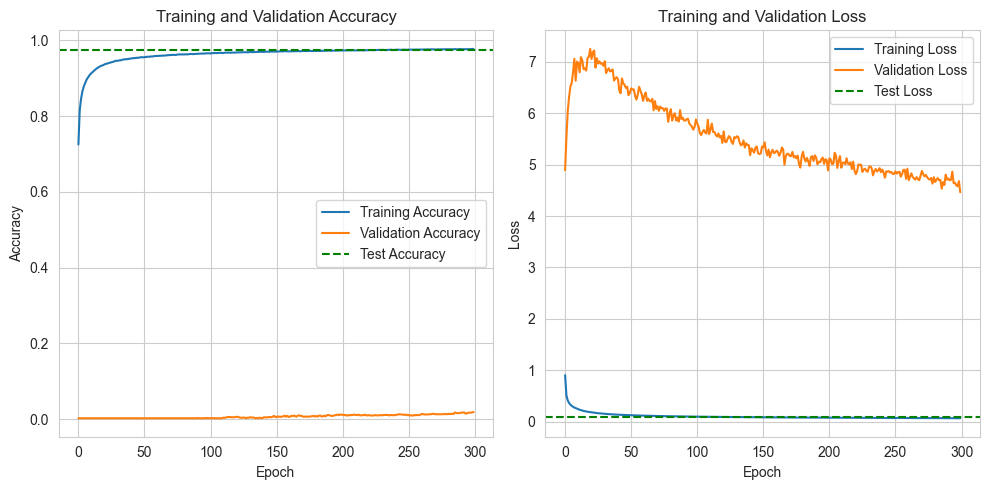

In [11]:
# 准确率曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 损失曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
    
plt.tight_layout()
plt.show()

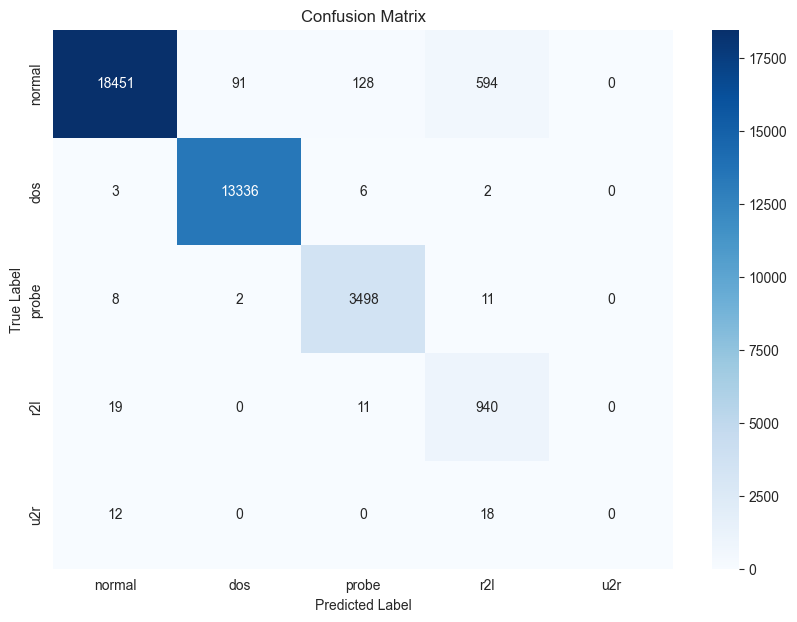

C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

label_mapping = ['normal', 'dos', 'probe', 'r2l', 'u2r']
class_names = label_mapping

# Assuming y_pred is the raw output predictions from the model, you need to convert these to class labels for some metrics
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  # Assuming y_test is already one-hot encoded, convert it back

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

def fdr_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    false_discoveries = np.sum(cm, axis=0) - np.diag(cm)
    total_predictions = np.sum(cm, axis=0)
    with np.errstate(divide='ignore', invalid='ignore'):
        fdrs = np.true_divide(false_discoveries, total_predictions)
        fdrs[np.isnan(fdrs)] = 0
    return np.mean(fdrs)

fdr = fdr_score(y_test_classes, y_pred_classes)

# Function to calculate MCC for a binary classification problem
# Adapted for multi-class by averaging over all classes
def mcc_score(y_true, y_pred):
    mcc = np.array([matthews_corrcoef(y_true == k, y_pred == k) for k in np.unique(y_true)])
    return np.nanmean(mcc)  # Averaging MCC scores over all classes

average_mcc = mcc_score(y_test_classes, y_pred_classes)

# Convert metrics to percentages
recall_percent = f"{recall * 100:.2f}%"
precision_percent = f"{precision * 100:.2f}%"
f1_percent = f"{f1 * 100:.2f}%"
tdr_percent = f"{(1-fdr) * 100:.2f}%"
average_mcc_percent = f"{average_mcc * 100:.2f}%"

In [13]:
print(f"Precision: {precision_percent}")
print(f"Recall: {recall_percent}")
print(f"F1 Score: {f1_percent}")
print(f"Average MCC: {average_mcc_percent}")
print(f"True Discovery Rate: {tdr_percent}")

Precision: 98.13%
Recall: 97.56%
F1 Score: 97.71%
Average MCC: 73.58%
True Discovery Rate: 91.03%


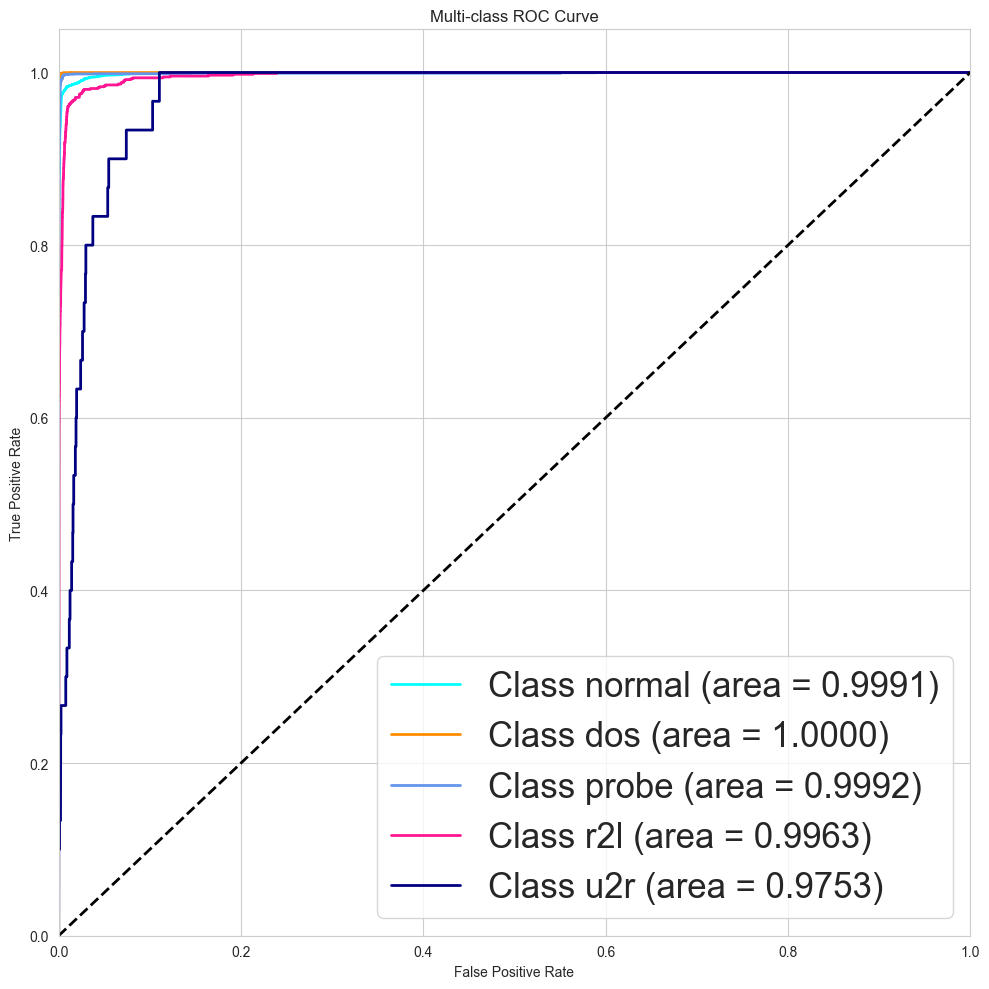

In [14]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# 如果y_test不是one-hot编码的，先将其转换
y_test_binarized = label_binarize(y_test_classes, classes=np.unique(y_test_classes))
n_classes = y_test_binarized.shape[1]

# 计算每个类的ROC曲线和ROC面积
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制所有类的ROC曲线
plt.figure(figsize=(10, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (area = {1:0.4f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
# 将图例放到图像外面并放大字体
plt.legend(loc='lower right', fontsize='25')
# 调整布局以防止图例被裁剪
plt.tight_layout()
plt.show()

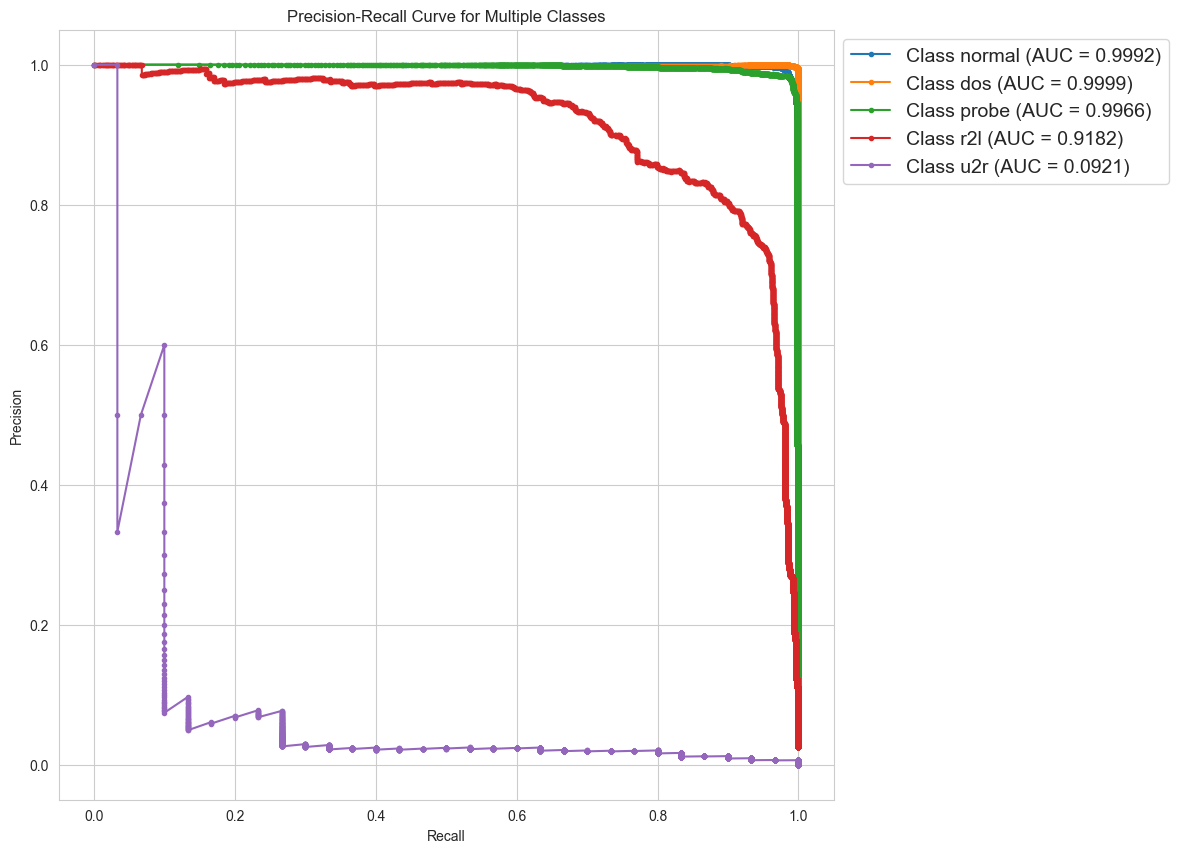

In [15]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 假设您已经有了y_pred，这是模型对测试集的预测概率
# 如果y_pred不是概率分数，请用model.predict(x_test)替换下面的y_score
y_score = y_pred  # 确保这是一个概率分数矩阵

# 将真实标签转换为 one-hot 编码
# 注意这里y_test_classes是真实的类标签，需要转换为one-hot编码形式
y_true_bin = label_binarize(y_test_classes, classes=np.unique(y_test_classes))

# 确定类别数和类别名称
n_classes = y_true_bin.shape[1]
class_names = ['normal', 'dos', 'probe', 'r2l', 'u2r']  # 举例，根据实际情况调整
    
# 创建一个新的图表
plt.figure(figsize=(10, 10))

# 为每个类别绘制PR曲线，并记录AUC值
auc_scores = []
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    auc_score = auc(recall, precision)
    auc_scores.append(auc_score)
    plt.plot(recall, precision, marker='.', label='Class {} (AUC = {:.4f})'.format(class_names[i], auc_score))

# 设置图表的其他属性
plt.title('Precision-Recall Curve for Multiple Classes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize=14)
# 将图例放置在图像的右侧外部
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
# 展示图表
plt.show()